In [5]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import copy
from pyebsdindex import ebsd_pattern, ebsd_index, pcopt
from pyebsdindex.EBSDImage import IPFcolor
from pathlib import *

In [ ]:
pip uninstall pyebsdindex

In [6]:
file = Path("/work/mz071159/EBSD/FIB/50_45/3mm/eps5/map20230612102528054.up1")
#s= kp.load(datadir)
#file = '~/Desktop/SLMtest/scan2v3lam0.90sr7dt0.0.up1'
PC = np.array([0.46424919, 0.70189953, 0.64026537])
cam_elev = 5.3
sampleTilt = 70.0
vendor = 'EDAX'

In [7]:
nT = 180 # 180/nTheta == degree resolution
nR = 90
tSig = 2.0 # amount of gaussian kernel size in theta in units of radon pixels.
rSig = 1.5 # amount of gassian 2nd derivate in rho in units of radon pixels.
rhomask = 0.1 # fraction of radius to not analyze
backgroundsub = False # enable/disable a simple background subtract of the patterns
nbands = 8
phaselist = ['FCC'] # ['FCC', 'BCC'] #

Radon Time: 29.089808812947012
Convolution Time: 5.556706788018346
Peak ID Time: 3.371936781972181
Band Label Time: 1.345682843006216
Total Band Find Time: 39.36443820898421
Band Vote Time:  3.547260280989576


<Figure size 640x480 with 0 Axes>

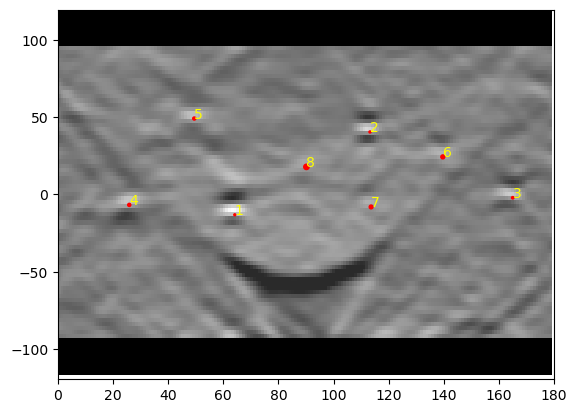

In [47]:
dat1,bnd1, indxer=ebsd_index.index_pats(filename = file,
                                     patstart = 0, npats = 4012,return_indexer_obj = True,
                                     backgroundSub = backgroundsub,
                                     nTheta = nT, nRho=nR,
                                     tSigma = tSig, rSigma = rSig,rhoMaskFrac=rhomask,nBands=nbands, \
                                     phaselist = phaselist, PC = PC, verbose = 2)
imshape = (indxer.fID.nRows, indxer.fID.nCols)

In [45]:
dat1.shape[1]

100

In [31]:
data_empt=np.zeros((imshape[0]*imshape[1]*3,2))
data_empt[0:dat1.shape[1]]=dat1

TypeError: Cannot cast array data from dtype([('quat', '<f8', (4,)), ('iq', '<f4'), ('pq', '<f4'), ('cm', '<f4'), ('phase', '<i4'), ('fit', '<f4'), ('nmatch', '<i4'), ('matchattempts', '<i4', (2,)), ('totvotes', '<i4')]) to dtype('float64') according to the rule 'unsafe'

In [46]:
ipfim = IPFcolor.qu2ipf_cubic(np.pad(dat1[-1]['quat'],int(imshape[0]*imshape[1]))).reshape(imshape[0], imshape[1], 3); plt.imshow(ipfim)

ValueError: cannot reshape array of size 24372 into shape (59,68,3)

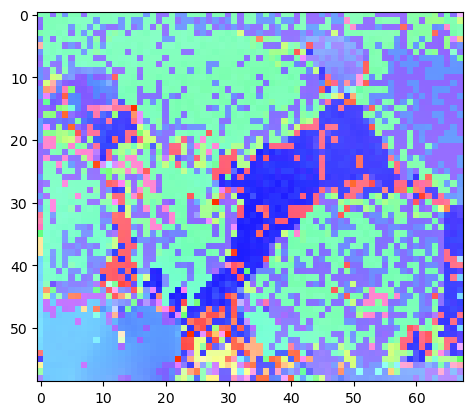

In [49]:
ipfim = IPFcolor.qu2ipf_cubic(dat1[-1]['quat']).reshape(imshape[0], imshape[1], 3); plt.imshow(ipfim)

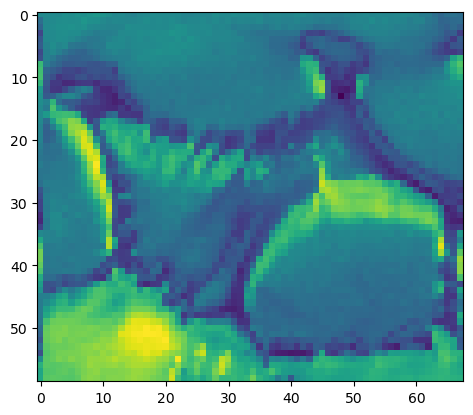

In [56]:
fit = (dat1[-1]['pq']).reshape(imshape[0],imshape[1]); 
plt.imshow(fit)
